In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ajustes para visualización
sns.set(style="whitegrid")

# Carga de datos
training_data = pd.read_csv('../training_progress.csv')
evaluation_data = pd.read_csv('../evaluation_results.csv')

In [3]:
# Exploración inicial de los datos de entrenamiento
print("Primeras filas de los datos de entrenamiento:")
print(training_data.head())
print("\nEstadísticas básicas:")
print(training_data.describe())

Primeras filas de los datos de entrenamiento:
     data  epoch      eta    loss  loss_box_reg  loss_classifier  \
0  0.6729      0  3:40:15  1.9992        0.1016           0.7202   
1  0.0002      0  1:21:11  0.6987        0.1542           0.1686   
2  0.0002      0  1:19:26  0.7092        0.1319           0.1722   
3  0.0002      0  1:18:05  0.6733        0.1469           0.1872   
4  0.0002      0  1:16:51  0.6480        0.1397           0.1803   

   loss_objectness  loss_rpn_box_reg        lr  max_mem  step    time  
0           0.9857            0.1916  0.000010     9078     0  1.7665  
1           0.2350            0.1265  0.000509     9583   100  0.6504  
2           0.2289            0.1232  0.001009     9583   200  0.6541  
3           0.2450            0.1090  0.001508     9583   300  0.6496  
4           0.2046            0.1121  0.002008     9583   400  0.6460  

Estadísticas básicas:
             data       epoch        loss  loss_box_reg  loss_classifier  \
count  152.000

In [4]:
# Exploración inicial de los datos de evaluación
print("\nPrimeras filas de los datos de evaluación:")
print(evaluation_data.head())
print("\nEstadísticas básicas:")
print(evaluation_data.describe())


Primeras filas de los datos de evaluación:
   Epoch Metric Type        IoU    Area  maxDets  Value
0      0   Precision  0.50:0.95     all      100  0.074
1      0   Precision       0.50     all      100  0.142
2      0   Precision       0.75     all      100  0.067
3      0   Precision  0.50:0.95   small      100  0.049
4      0   Precision  0.50:0.95  medium      100  0.055

Estadísticas básicas:
           Epoch     maxDets      Value
count  24.000000   24.000000  24.000000
mean    0.500000   84.250000   0.164792
std     0.510754   36.024448   0.096388
min     0.000000    1.000000   0.049000
25%     0.000000  100.000000   0.080250
50%     0.500000  100.000000   0.148000
75%     1.000000  100.000000   0.227000
max     1.000000  100.000000   0.373000


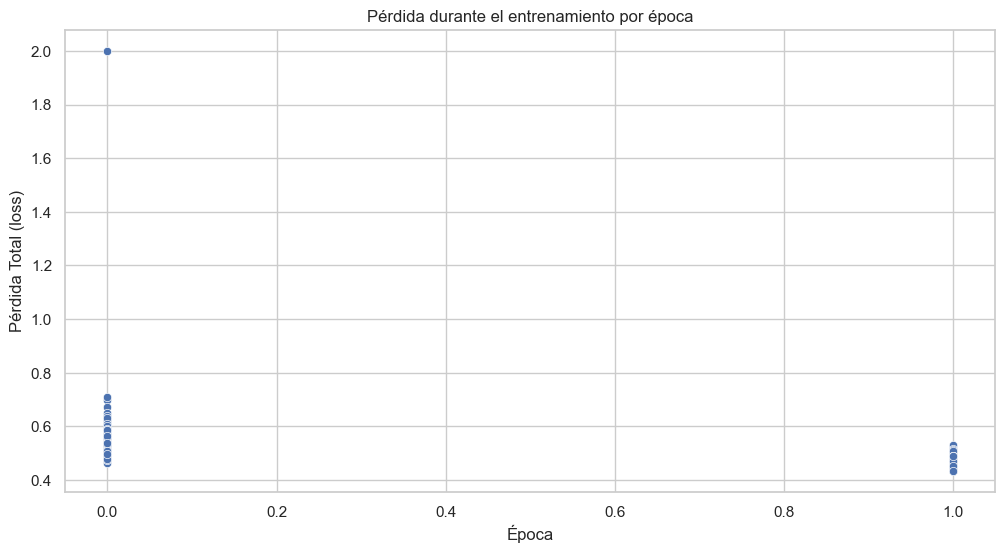

In [5]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=training_data, x='epoch', y='loss')
plt.title('Pérdida durante el entrenamiento por época')
plt.xlabel('Época')
plt.ylabel('Pérdida Total (loss)')
plt.show()


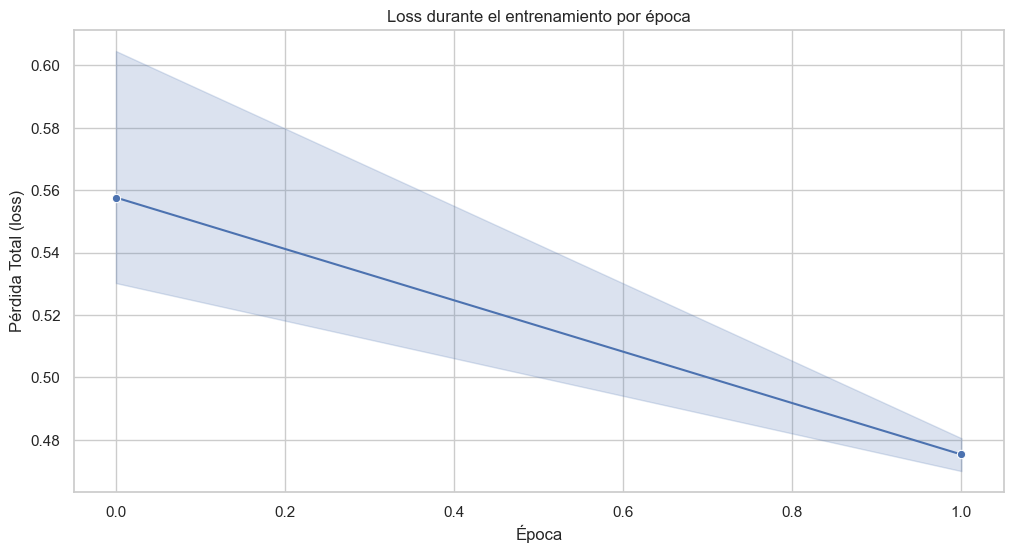

In [6]:
# Análisis de los datos de entrenamiento
# Graficaremos la pérdida total ('loss') a lo largo de las épocas.
plt.figure(figsize=(12, 6))
sns.lineplot(data=training_data, x='epoch', y='loss', marker='o', 
             #errorbar=None
             )
plt.title('Loss durante el entrenamiento por época')
plt.xlabel('Época')
plt.ylabel('Pérdida Total (loss)')
plt.show()

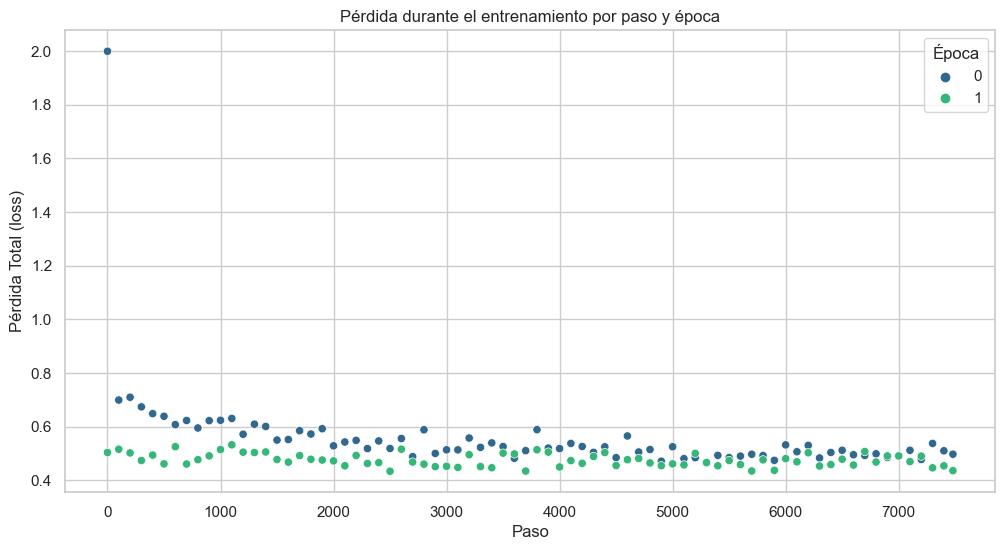

In [7]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=training_data, x='step', y='loss', hue='epoch', palette='viridis', legend='full')
plt.title('Pérdida durante el entrenamiento por paso y época')
plt.xlabel('Paso')
plt.ylabel('Pérdida Total (loss)')
plt.legend(title='Época')
plt.show()


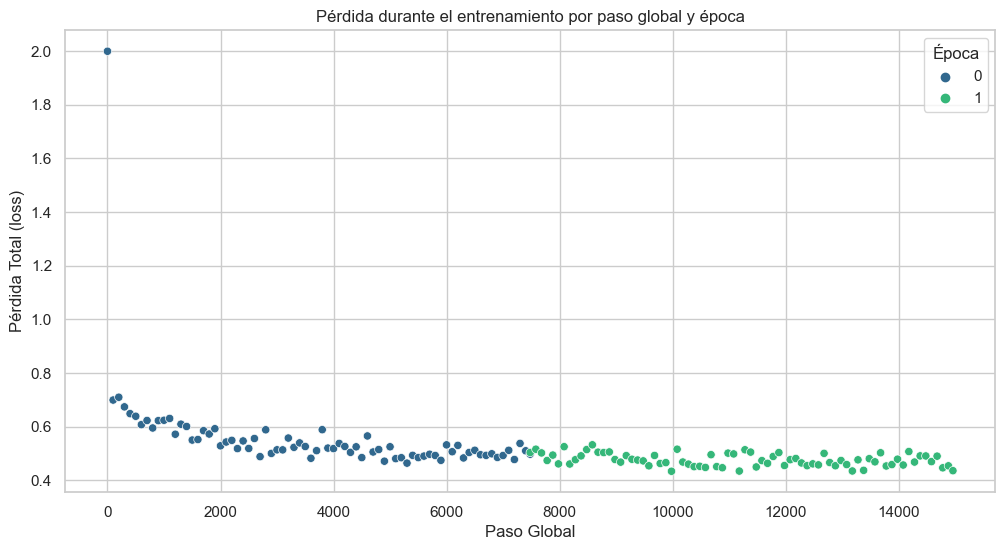

In [8]:
# Supongamos que 'training_data' es tu DataFrame y que tienes columnas 'epoch' y 'step'.
# Crearemos una nueva columna 'global_step' que será el paso global acumulativo.

# Calculamos el paso máximo por época para saber dónde empieza cada una.
max_step_per_epoch = training_data.groupby('epoch')['step'].max().cumsum()

# Mapeamos cada época a su paso inicial (el paso acumulado donde comienza la época).
epoch_start_step = {epoch: max_step_per_epoch[epoch - 1] if epoch > 0 else 0 for epoch in training_data['epoch'].unique()}

# Creamos la columna 'global_step' sumando el paso inicial de la época al paso actual.
training_data['global_step'] = training_data.apply(lambda row: epoch_start_step[row['epoch']] + row['step'], axis=1)

# Ahora podemos graficar usando 'global_step' en lugar de 'step'.
plt.figure(figsize=(12, 6))
sns.scatterplot(data=training_data, x='global_step', y='loss', hue='epoch', palette='viridis', legend='full')
plt.title('Pérdida durante el entrenamiento por paso global y época')
plt.xlabel('Paso Global')
plt.ylabel('Pérdida Total (loss)')
plt.legend(title='Época')
plt.show()


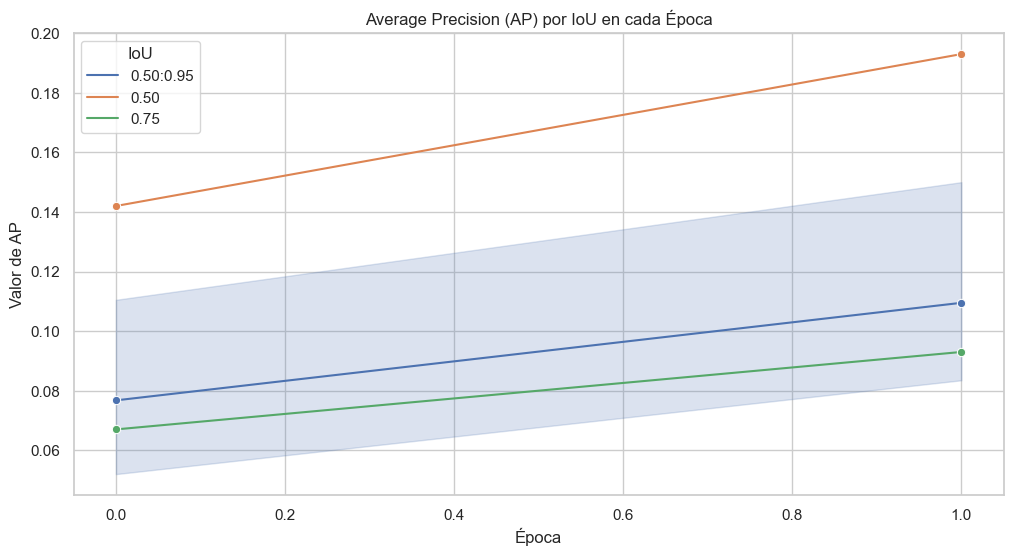

In [9]:
# Análisis de los datos de evaluación
# Graficaremos la Precisión Promedio (AP) por IoU en cada época.
plt.figure(figsize=(12, 6))
sns.lineplot(data=evaluation_data[evaluation_data['Metric Type'] == 'Precision'], x='Epoch', y='Value', hue='IoU', marker='o')
plt.title('Average Precision (AP) por IoU en cada Época')
plt.xlabel('Época')
plt.ylabel('Valor de AP')
plt.show()

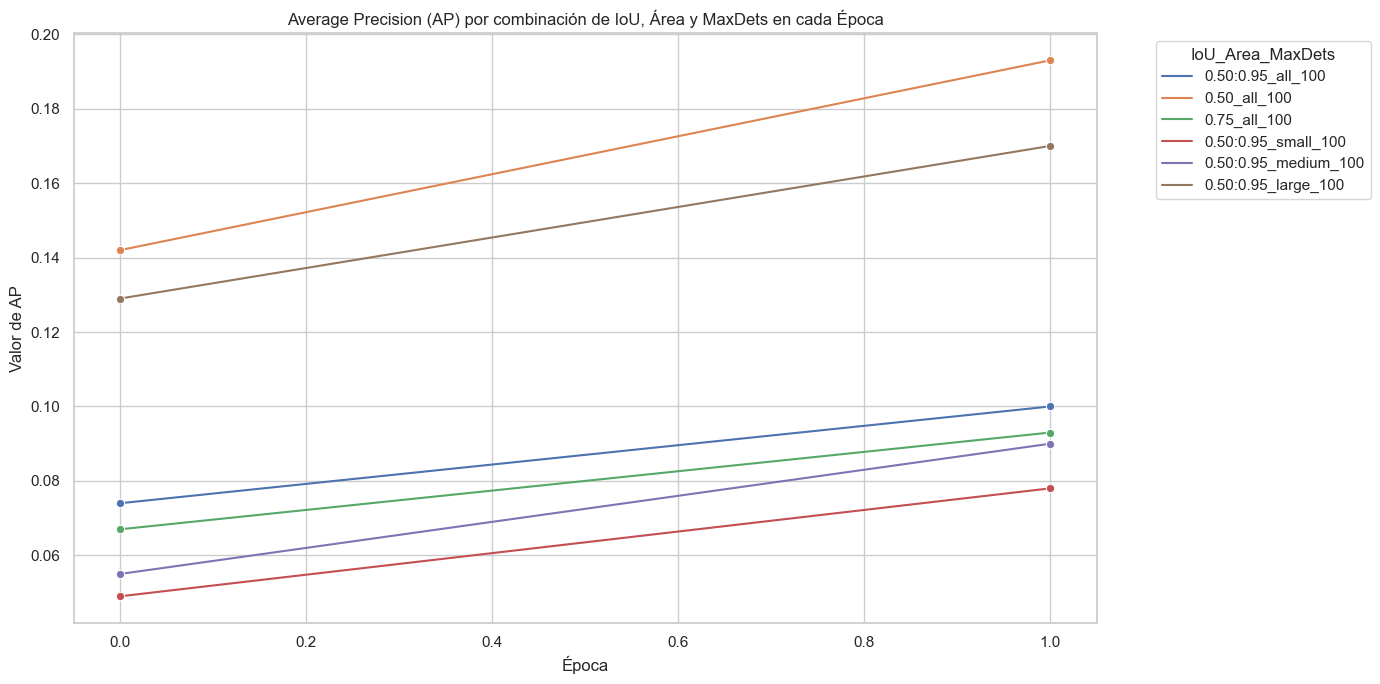

In [10]:
# Suponiendo que 'evaluation_data' es tu DataFrame y tiene las columnas 'IoU', 'Area', y 'MaxDets'.
# Primero, creamos una nueva columna que combine las tres para hacer una etiqueta única.
evaluation_data['IoU_Area_MaxDets'] = evaluation_data.apply(lambda x: f"{x['IoU']}_{x['Area']}_{x['maxDets']}", axis=1)

# Ahora, creamos el gráfico de líneas usando esta nueva columna para el argumento 'hue'.
plt.figure(figsize=(14, 7))
sns.lineplot(data=evaluation_data[evaluation_data['Metric Type'] == 'Precision'],
             x='Epoch', y='Value', hue='IoU_Area_MaxDets', marker='o')

plt.title('Average Precision (AP) por combinación de IoU, Área y MaxDets en cada Época')
plt.xlabel('Época')
plt.ylabel('Valor de AP')
plt.legend(title='IoU_Area_MaxDets', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajusta el layout para que la leyenda no cubra el gráfico
plt.show()


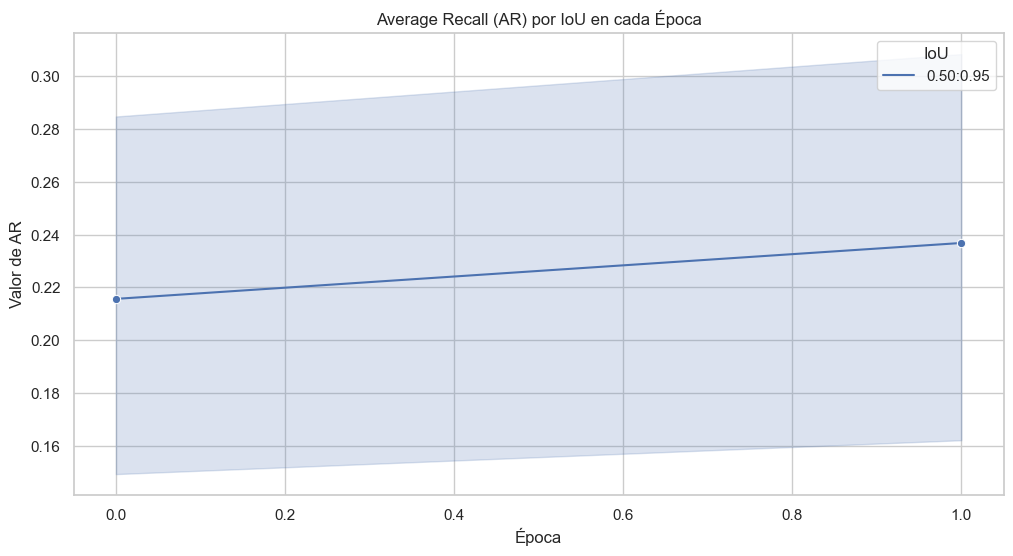

In [11]:
# También podemos analizar el Recall Promedio (AR) por IoU en cada época.
plt.figure(figsize=(12, 6))
sns.lineplot(data=evaluation_data[evaluation_data['Metric Type'] == 'Recall'], x='Epoch', y='Value', hue='IoU', marker='o')
plt.title('Average Recall (AR) por IoU en cada Época')
plt.xlabel('Época')
plt.ylabel('Valor de AR')
plt.show()

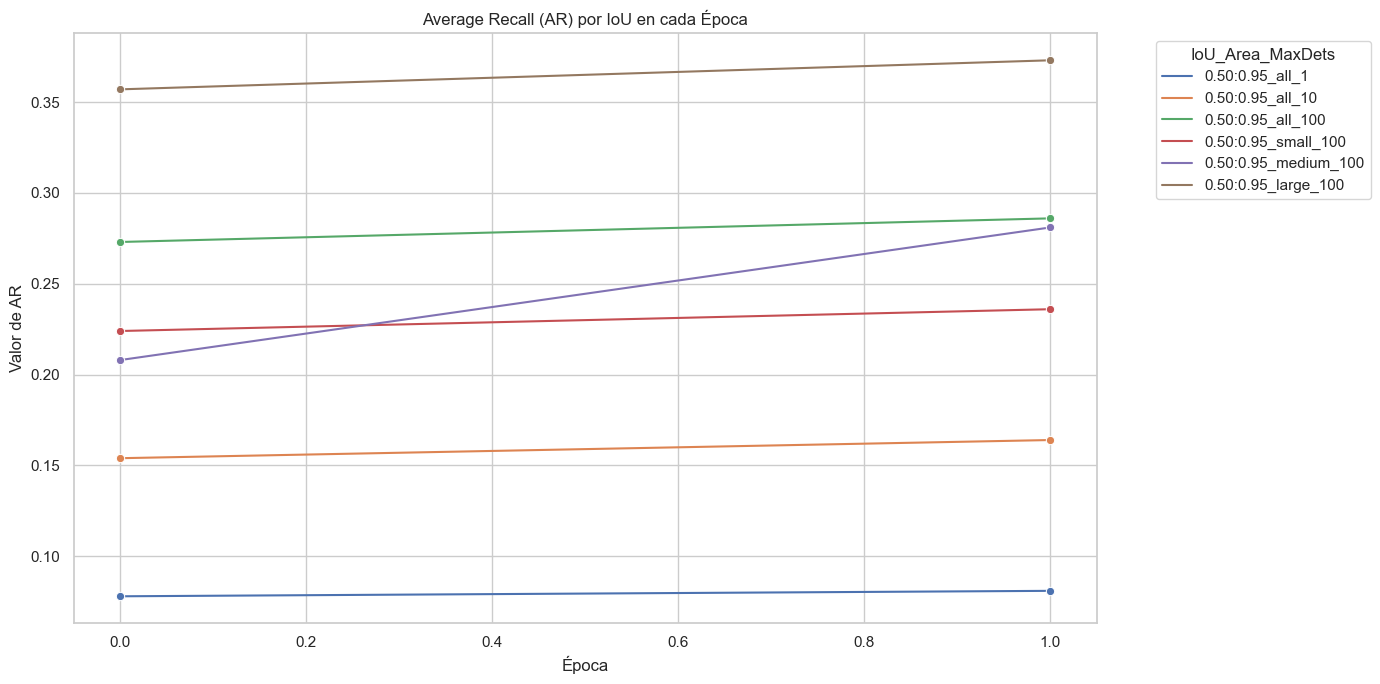

In [12]:
# Ahora, creamos el gráfico de líneas usando esta nueva columna para el argumento 'hue'.
plt.figure(figsize=(14, 7))
sns.lineplot(data=evaluation_data[evaluation_data['Metric Type'] == 'Recall'],
             x='Epoch', y='Value', hue='IoU_Area_MaxDets', marker='o')

plt.title('Average Recall (AR) por IoU en cada Época')
plt.xlabel('Época')
plt.ylabel('Valor de AR')
plt.legend(title='IoU_Area_MaxDets', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajusta el layout para que la leyenda no cubra el gráfico
plt.show()
